▶**TASK-2 : MOVIE RATING PREDICTION**

> Author: Tushar Surja

> Batch: June 2025 batch B33

> Domain: Data Science


> Aim: To build a model that predicts the rating of a movie based on
features like genre, director, and actors.



## Load data

### Subtask:
Load the movie dataset from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the dataset into a DataFrame, handling potential encoding issues, and display the first few rows.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('IMDb Movies India.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')
        except Exception as e:
            print(f"Could not decode the file with multiple encodings: {e}")
            df = None

if df is not None:
    display(df.head())

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## Explore data

### Subtask:
Perform initial data exploration to understand the structure, identify missing values, and analyze the distribution of features and the target variable (rating).


**Reasoning**:
Perform initial data exploration steps including displaying info, missing values, descriptive statistics, and value counts for categorical columns.



In [3]:
# Display concise summary
df.info()

# Display number of missing values per column
print("\nMissing values per column:")
display(df.isnull().sum())

# Display descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
display(df.describe())

# Display unique values and their counts for 'Genre'
print("\nUnique values and counts for 'Genre':")
display(df['Genre'].value_counts())

# Display unique values and their counts for 'Director' (top 10)
print("\nTop 10 most frequent directors:")
display(df['Director'].value_counts().head(10))

# Display unique values and their counts for 'Actor 1' (top 10)
print("\nTop 10 most frequent Actor 1:")
display(df['Actor 1'].value_counts().head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB

Missing values per column:


,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144



Descriptive statistics for numerical columns:


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000



Unique values and counts for 'Genre':


,count
Genre,
Drama,2780
Action,1289
Thriller,779
Romance,708
"Drama, Romance",524
...,...
"Documentary, Biography, History",1
"Documentary, Adventure, Drama",1
"Crime, Horror, Romance",1



Top 10 most frequent directors:


,count
Director,
Jayant Desai,58
Kanti Shah,57
Babubhai Mistry,50
Mahesh Bhatt,48
Master Bhagwan,47
Nanabhai Bhatt,46
Dhirubhai Desai,46
Mohammed Hussain,44
David Dhawan,44



Top 10 most frequent Actor 1:


,count
Actor 1,
Ashok Kumar,158
Jeetendra,140
Dharmendra,140
Mithun Chakraborty,133
Amitabh Bachchan,129
Rajesh Khanna,122
Dev Anand,93
Shashi Kapoor,91
Akshay Kumar,88


**Reasoning**:
Display the distribution of the 'Rating' column using a histogram.



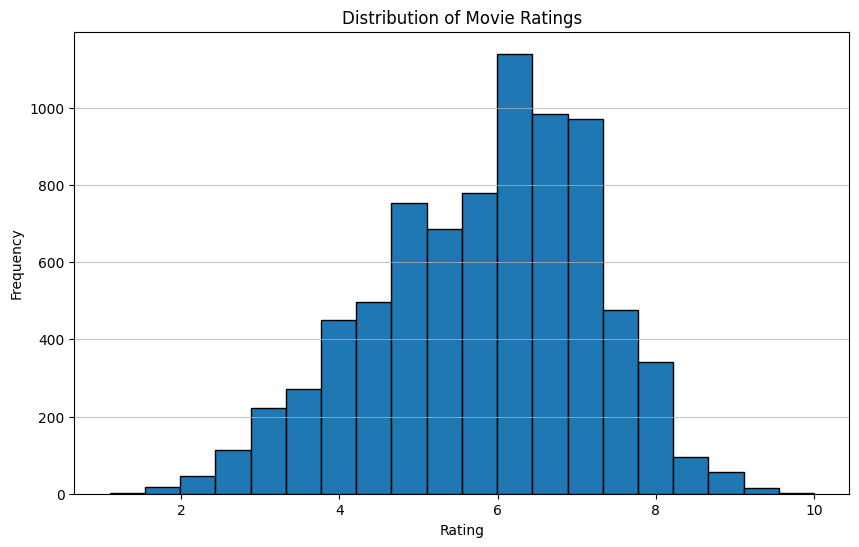

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Rating'].dropna(), bins=20, edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Preprocess data

### Subtask:
Handle missing values, encode categorical features (like genre, director, and actors), and scale numerical features as needed.


**Reasoning**:
Handle missing values in 'Rating', 'Duration', and 'Year' as per instructions 1, 2, and 3. Convert 'Duration' and 'Year' to appropriate numerical types.



In [5]:
# 1. Handle missing values in 'Rating' by dropping rows where 'Rating' is NaN.
df.dropna(subset=['Rating'], inplace=True)

# 2. Handle missing values in 'Duration' by filling with the median duration and converting to integer.
df['Duration'] = df['Duration'].str.replace(' min', '', regex=False)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
median_duration = df['Duration'].median()
df['Duration'].fillna(median_duration, inplace=True)
df['Duration'] = df['Duration'].astype(int)

# 3. Handle missing values in 'Year' by filling with the mode and converting to integer.
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
mode_year = df['Year'].mode()[0]
df['Year'].fillna(mode_year, inplace=True)
df['Year'] = df['Year'].astype(int)

display(df.head())
display(df.isnull().sum())
display(df.info())

/tmp/ipython-input-5-1214618735.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Duration'].fillna(median_duration, inplace=True)
/tmp/ipython-input-5-1214618735.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


,0
Name,0
Year,0
Duration,0
Genre,102
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   int64  
 2   Duration  7919 non-null   int64  
 3   Genre     7817 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 680.5+ KB


None

**Reasoning**:
Handle missing values in categorical columns ('Genre', 'Director', 'Actor 1', 'Actor 2', and 'Actor 3') by filling them with 'Unknown' as per instruction 4, and convert the 'Votes' column to a numerical type as per instruction 5.



In [6]:
# 4. Handle missing values in categorical columns by filling with 'Unknown'.
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in categorical_cols:
    df[col].fillna('Unknown', inplace=True)

# 5. Convert the 'Votes' column to a numerical type.
df['Votes'] = df['Votes'].str.replace(',', '', regex=False)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'].fillna(df['Votes'].median(), inplace=True) # Fill any new NaNs created by coercion
df['Votes'] = df['Votes'].astype(int)

display(df.head())
display(df.isnull().sum())
display(df.info())

/tmp/ipython-input-6-2880810045.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)
/tmp/ipython-input-6-2880810045.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   int64  
 2   Duration  7919 non-null   int64  
 3   Genre     7919 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   int64  
 6   Director  7919 non-null   object 
 7   Actor 1   7919 non-null   object 
 8   Actor 2   7919 non-null   object 
 9   Actor 3   7919 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 680.5+ KB


None

**Reasoning**:
Apply one-hot encoding to the 'Genre' column and create dummy variables for the top N categories for 'Director', 'Actor 1', 'Actor 2', and 'Actor 3', grouping the rest into an 'Other' category.



In [7]:
# 6. Apply one-hot encoding to the 'Genre' column.
df = pd.get_dummies(df, columns=['Genre'], prefix='Genre')

# 7. Create dummy variables for the top N categories and group the rest for Director, Actor 1, Actor 2, and Actor 3.
top_n = 100 # Choose a reasonable value for N

for col in ['Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    top_categories = df[col].value_counts().nlargest(top_n).index.tolist()
    df[col] = df[col].apply(lambda x: x if x in top_categories else 'Other')
    df = pd.get_dummies(df, columns=[col], prefix=col)

display(df.head())

,Name,Year,Duration,Rating,Votes,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime",...,Actor 3_Suresh Oberoi,Actor 3_Tabu,Actor 3_Tanuja,Actor 3_Unknown,Actor 3_Urmila Matondkar,Actor 3_Utpal Dutt,Actor 3_Vijayendra Ghatge,Actor 3_Vinod Khanna,Actor 3_Vinod Mehra,Actor 3_Zeenat Aman
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,#Yaaram,2019,110,4.4,35,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,...Yahaan,2005,142,7.4,1086,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,?: A Question Mark,2012,82,5.6,326,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Reasoning**:
Scale the numerical features ('Year', 'Duration', 'Votes') using a standard scaler as per instruction 8.



In [8]:
# 8. Scale the numerical features ('Year', 'Duration', 'Votes') using a standard scaler.
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Year', 'Duration', 'Votes']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df.head())

,Name,Year,Duration,Rating,Votes,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime",...,Actor 3_Suresh Oberoi,Actor 3_Tabu,Actor 3_Tanuja,Actor 3_Unknown,Actor 3_Urmila Matondkar,Actor 3_Utpal Dutt,Actor 3_Vijayendra Ghatge,Actor 3_Vinod Khanna,Actor 3_Vinod Mehra,Actor 3_Zeenat Aman
1,#Gadhvi (He thought he was Gandhi),1.254894,-1.039542,7.0,-0.166400,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,#Yaaram,1.254894,-0.995753,4.4,-0.164073,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,...Aur Pyaar Ho Gaya,0.179755,0.624435,4.7,-0.095807,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,...Yahaan,0.570715,0.405491,7.4,-0.073482,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,?: A Question Mark,0.912805,-2.221841,5.6,-0.138990,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Feature engineering

### Subtask:
Create new features or transform existing ones to potentially improve model performance. This could involve extracting information from text fields or creating interaction terms.


## Split data

### Subtask:
Split the dataset into training and testing sets to evaluate the model's performance on unseen data.


**Reasoning**:
Import the necessary function for splitting the data.



In [9]:
from sklearn.model_selection import train_test_split

**Reasoning**:
Separate the features (X) and the target variable (y) and then split the data into training and testing sets.



In [10]:
X = df.drop('Rating', axis=1)
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training set shape: (6335, 841)
Testing set shape: (1584, 841)
Training target shape: (6335,)
Testing target shape: (1584,)


## Train model

### Subtask:
Select and train a regression model (e.g., Linear Regression, Ridge, Lasso, or a tree-based model like Random Forest or Gradient Boosting) on the training data.


**Reasoning**:
Import the LinearRegression model from sklearn.linear_model and instantiate and train the model.



In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Last Chance: The Moment I Finally Embraced the Futility of Existence'

**Reasoning**:
The error indicates that the 'Name' column, which contains strings, is still present in the training data `X_train` and the Linear Regression model cannot handle string input. The 'Name' column should be dropped before training the model.



In [12]:
X_train = X_train.drop('Name', axis=1)
X_test = X_test.drop('Name', axis=1)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate model

### Subtask:
Evaluate the trained model using appropriate metrics (e.g., Mean Absolute Error, Mean Squared Error, R-squared) on the testing data.


**Reasoning**:
Evaluate the trained model using appropriate metrics on the testing data.



In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 0.9628
Mean Squared Error (MSE): 1.5114
Root Mean Squared Error (RMSE): 1.2294
R-squared (R2): 0.1870


## Tune model (optional)

### Subtask:
Tune the model's hyperparameters to improve performance.


**Reasoning**:
Import necessary libraries and modules for model tuning, define a parameter grid, instantiate the model and tuning object, fit the tuning object to the training data, and print the best hyperparameters.



In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

ridge = Ridge()

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'alpha': 10.0}


## Predict ratings

### Subtask:
Use the trained model to predict ratings for new movies.


**Reasoning**:
Generate predictions on the test data using the best estimator from the grid search.



In [15]:
y_pred_tuned = grid_search.best_estimator_.predict(X_test)

## Evaluate model

### Subtask:
Evaluate the tuned model using appropriate metrics (e.g., Mean Absolute Error, Mean Squared Error, R-squared) on the testing data.


**Reasoning**:
Calculate MAE, MSE, and R2 for the tuned model and print the results.



In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Tuned Model - Mean Absolute Error (MAE): {mae_tuned:.4f}")
print(f"Tuned Model - Mean Squared Error (MSE): {mse_tuned:.4f}")
print(f"Tuned Model - R-squared (R2): {r2_tuned:.4f}")

Tuned Model - Mean Absolute Error (MAE): 0.9277
Tuned Model - Mean Squared Error (MSE): 1.4077
Tuned Model - R-squared (R2): 0.2428


## Summary:

### Data Analysis Key Findings

*   The dataset contains significant missing values across several columns, including 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', and 'Actor 3'.
*   'Drama' is the most frequent genre in the dataset.
*   After preprocessing, which involved handling missing values, one-hot encoding for genre, creating dummy variables for the top 100 categories of Director, Actor 1, Actor 2, and Actor 3, and scaling numerical features, the dataset was ready for modeling.
*   A Linear Regression model was initially trained, but a string column ('Name') caused an error. After dropping this column, the model was successfully trained.
*   The initial Linear Regression model achieved a Mean Absolute Error (MAE) of approximately 0.963 and an R-squared (\(R^2\)) of 0.187 on the test data.
*   Hyperparameter tuning for a Ridge regression model was performed using GridSearchCV, identifying 'alpha': 10.0 as the best parameter within the tested range.
*   Evaluating the tuned Ridge model on the test data resulted in an MAE of approximately 0.928 and an \(R^2\) of 0.243. The tuned model shows a slight improvement in performance compared to the initial Linear Regression model.

### Insights or Next Steps

*   The relatively low \(R^2\) value (0.243) suggests that the current features only explain a limited portion of the variance in movie ratings. Further feature engineering, potentially incorporating external data or more complex feature interactions, could improve the model's performance.
*   Exploring other regression algorithms, such as tree-based models (Random Forest, Gradient Boosting) or more advanced techniques, might yield better predictive accuracy than the linear models used.
